<a href="https://colab.research.google.com/github/SarvjeetAnand/CIP-Data-Science-Internship/blob/main/IMDB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Data Analysis**

## importing libries and Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
imdb_df=pd.read_csv("/content/imdb_top_1000.csv")

In [ ]:
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## **Data PreProcessing**

In [ ]:
imdb_df.shape

(1000, 16)

In [ ]:
imdb_df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
imdb_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [ ]:
imdb_df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
imdb_df['Certificate'].fillna('U',inplace=True)

In [ ]:
imdb_df['Meta_score'].fillna(imdb_df['Meta_score'].mean(),inplace=True)

In [ ]:
imdb_df['Gross'] =imdb_df['Gross'].str.replace(',', '')
print(imdb_df['Gross'].head(1))

imdb_df['Gross'] = imdb_df['Gross'].astype('float64')
imdb_df['Gross'] = imdb_df['Gross'].replace(np.nan, 0)

0    28341469
Name: Gross, dtype: object


In [ ]:
imdb_df["Gross"] = imdb_df["Gross"].replace(0,imdb_df['Gross'].mean())

In [ ]:
imdb_df.isnull().sum().sort_values(ascending=False)[0:5]

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
dtype: int64

In [ ]:
# drop rows with 'PG' value in the 'Released_Year' column
imdb_df = imdb_df[imdb_df['Released_Year'].str.isnumeric()]

# convert 'Released_Year' column to datetime format
imdb_df['Released_Year'] = pd.to_datetime(imdb_df['Released_Year'], format='%Y')

<ipython-input-88-4be00ac7194d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df['Released_Year'] = pd.to_datetime(imdb_df['Released_Year'], format='%Y')


In [ ]:
imdb_df['Certificate'] = imdb_df['Certificate'].str.strip()

<ipython-input-89-1db591ad04e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df['Certificate'] = imdb_df['Certificate'].str.strip()


In [ ]:
imdb_df['Genre'] = imdb_df['Genre'].str.split(',').str[0]

<ipython-input-90-2c2158535b4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df['Genre'] = imdb_df['Genre'].str.split(',').str[0]


In [ ]:
imdb_df['Meta_score'] = imdb_df['Meta_score'].replace('-', 0)

<ipython-input-91-52cc90ac72c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_df['Meta_score'] = imdb_df['Meta_score'].replace('-', 0)


In [ ]:
imdb_df['Meta_score'] = imdb_df['Meta_score'].astype(int)

In [ ]:
imdb_df['Director'] = imdb_df['Director'].str.strip()

<Axes: xlabel='IMDB_Rating', ylabel='Count'>

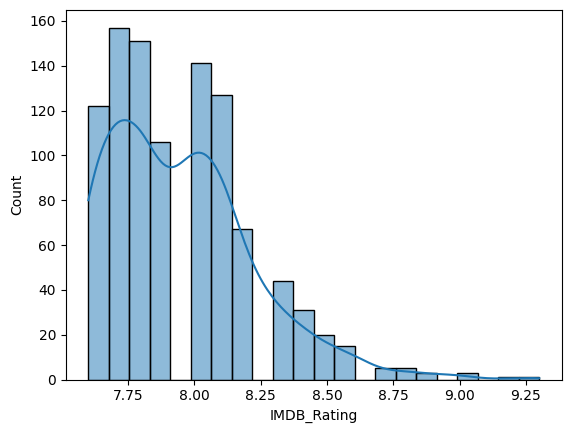

In [ ]:
sns.histplot(imdb_df['IMDB_Rating'], kde=True)

<Axes: xlabel='Genre', ylabel='IMDB_Rating'>

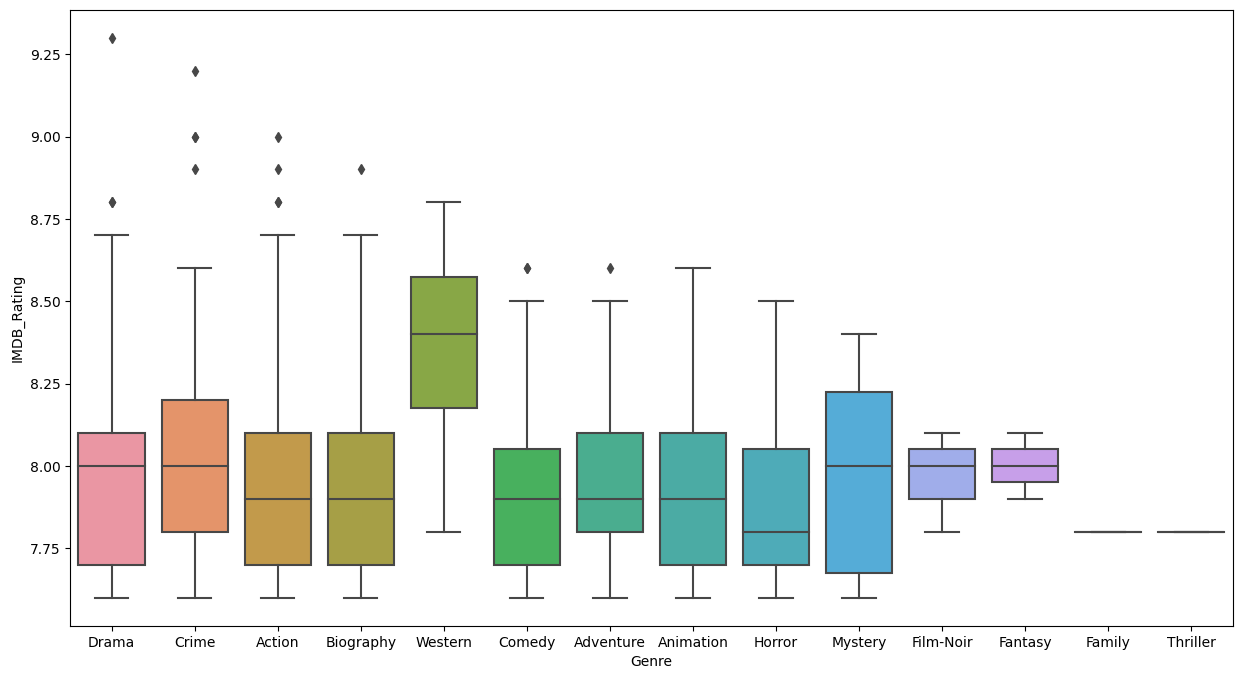

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Genre', y='IMDB_Rating', data=imdb_df)

<ipython-input-96-31f0d3b85a55>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(imdb_df['Gross'], shade=True)


<Axes: xlabel='Gross', ylabel='Density'>

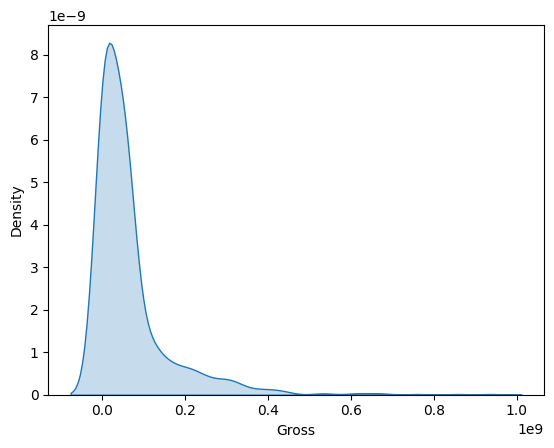

In [ ]:
sns.kdeplot(imdb_df['Gross'], shade=True)

<Axes: xlabel='IMDB_Rating', ylabel='Gross'>

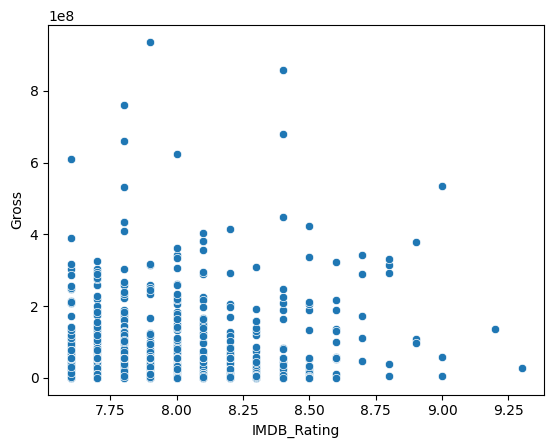

In [ ]:
sns.scatterplot(x='IMDB_Rating', y='Gross', data=imdb_df)

In [ ]:
top_genres = imdb_df['Genre'].value_counts().nlargest(5)
print(top_genres)

Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Name: Genre, dtype: int64


<ipython-input-105-c35ad6663b9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(imdb_df.corr(), annot=True)


<Axes: >

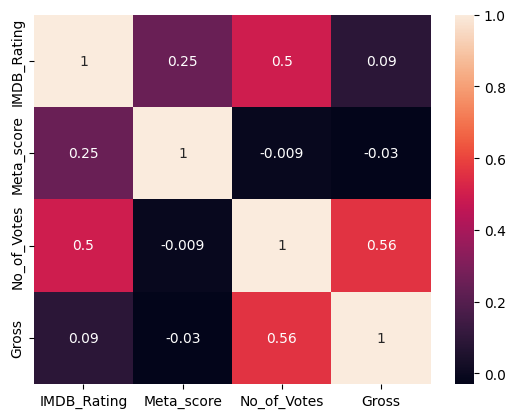

In [ ]:
sns.heatmap(imdb_df.corr(), annot=True)

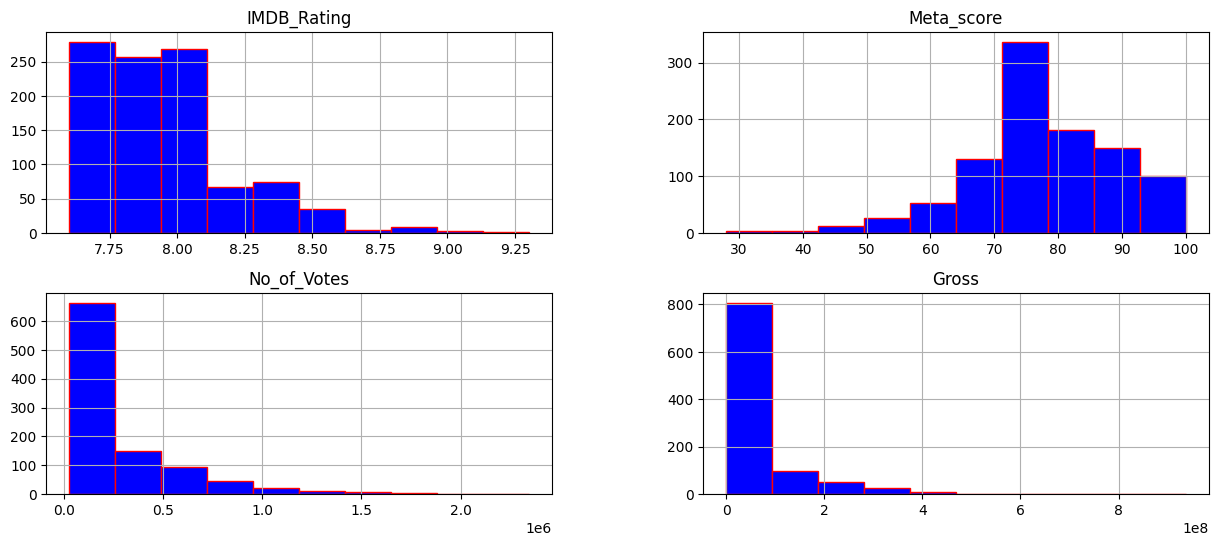

In [ ]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
imdb_df[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));